# Scipy

## Scipyとは
- 数学、工学、科学計算のための多種多様なライブラリを提供する。
- 内部の行列計算にはNumpyが使われている。
- 提供されている関数群は非常に多い。
  - 統計計算
  - 最適化
  - 微分・積分
  - フーリエ解析
  - 画像処理


## 微分方程式を解く

- 微分方程式とは
  - 物理現象や社会現象の変化をモデル化したもので工学分野では広く利用されている。
  - 微分方程式の例
    - 雨粒の落下速度の変化
    - 人口増加の変化
    - 熱いコーヒーが冷める温度変化
    - 感染症の流行過程の変化（SIRモデル）
    など
- Scipyでは微分方程式を解く機能があり、初期値を変化させることでシュミレーションが出来る。


### SIRモデルで感染症の感染者数の推移を見る

　SIRモデルとは、感染症の流行過程を記述した微分方程式

感受性保持者: $S$ (未感染者）、感染者：$I$、免疫保持者：$R$ (感染して回復した人）
とした場合以下の式でモデル化できる。

$$
\begin{array}{lll}
S'(t) & = & -\beta S(t)I(t) \\
\\
I'(t) & = & \beta S(t)I(t) -\gamma I(t)\\
\\
R'(t) & = & \gamma I(t) \\
\end{array}
$$

$t$ は時刻。$\beta$ 、$\gamma$ はそれぞれ、いわゆる感染率、回復率。

(参考) 上の微分方程式の意味。

未感染者数($S$)は、その時点の未感染者数($S$)と感染者数($I$)の積に比例したスピードで減っていく。

免疫保持者数($R$)は、その時点の感染者数($I$)に比例したスピードへ増えていく。

感染者数($I$)の増えるスピードは、未感染者が感染するスピード($-S'(t)$)と感染者が回復するスピード($R'(t)$)の差。

### scipyを使った微分方程式の解
　scipyのscipy.integrateモジュールのsolv_ivp関数を使用すると簡単なコードで微分方程式を解くことができる。

- 手順  
STEP1 初期値、パラメータ値決め  
STEP2 微分方程式の関数定義  
STEP3 solv_ivp関数により計算  
STEP4 結果を可視化


#### STEP0
　必要なライブラリインポート。




In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


#### STEP1

　初期値、パラメータ値決め。

　人口１０００人の町で最初の感染者が1人出たとする。



In [2]:
#160日間の推移を見る
T = 160
#感受性保持者初期値（未感染者）
S0=999
#感染者初期値（最初の感染者は１人）
I0=1
#免疫保持者初期値（最初は誰も免疫を持っていない）
R0=0

#beta, gamma = 0.0002, 0.1
beta, gamma = 0.0002, 0.1

### STEP2

　微分方程式の関数定義。

　第一引数が時間 $t$、第2引数が $S$、$I$、$R$ のリストで、戻り値が $S'$、$I'$、$R'$のリストになるような関数を定義します。
　


In [3]:
#y[0]がS(t), y[1]がI(t)の値, y[2]がR(t)の値
def SIR(t, y):
    dS = -beta * y[0] * y[1]
    dI = beta * y[0] *y[1] - gamma * y[1]
    dR = gamma * y[1]
    return [dS, dI, dR]

#### STEP3

 solv_ivp関数により計算。

In [4]:
#slove_ivp に 関数、計算区間、初期値、計算したいtの値のリストを与える
result = solve_ivp(SIR, [0, T], 
                [S0, I0, R0], t_eval=np.arange(0, T))


#### STEP4

　結果を可視化

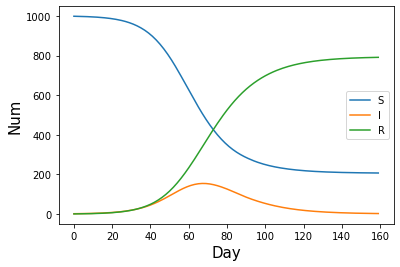

In [5]:
# 可視化
# resultのtプロパティにt_evalで与えた値が、yプロパティにS,I,Rの値が格納されている。
plt.xlabel("Day", fontsize=15)
plt.ylabel("Num", fontsize=15)
plt.plot(result.t, result.y[0], label='S')
plt.plot(result.t, result.y[1], label='I')
plt.plot(result.t, result.y[2], label='R')

plt.legend()


#### odeint 関数でも解ける

微分方程式を解くアルゴリズムはいくつもある。

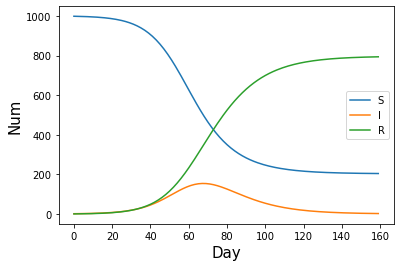

In [6]:
from scipy.integrate import odeint

T = 160
S0=999
I0=1
R0=0
beta, gamma = 0.0002, 0.1

#y[0]がS(t), y[1]がI(t)の値
def SIR2(y, t):
    dS = -beta * y[0] * y[1]
    dI = beta * y[0] * y[1] - gamma * y[1]
    dR = gamma * y[1]
    return [dS, dI, dR]

t_list = np.arange(0, T)
result2 = odeint(SIR2, [S0, I0, R0], t_list)

plt.xlabel("Day",fontsize=15)
plt.ylabel("Num",fontsize=15)
plt.plot(t_list,result2[:,0],label='S')
plt.plot(t_list,result2[:,1],label='I')
plt.plot(t_list,result2[:,2],label='R')

plt.legend()

## 最適化(フィッティング)

- フィッティングとは  
  - 観測したデータから、指定した関数で近似する手法
  - 青点が観測データ、赤い直線が近似関数

　　<img src="fig/fitting.png" width="40%">


### フィッティングを試す

STEP0 観測データを乱数で生成

STEP1 近似する関数を定義する

STEP2 Scipyのフィッティング機能を使い計算



#### STEP0
　観測データを乱数で生成

　$y = x$ のグラフに対し $y$ に正規分布誤差を加えて、仮の観測データとする。

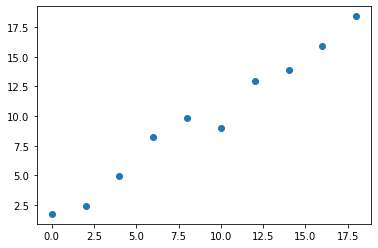

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
list_linear_x = range(0,20,2)

np.random.seed(0)
error = np.random.normal(size=len(list_linear_x))

array_x = np.array(list_linear_x)
array_y = array_x + error
plt.scatter(array_x,array_y)

#### STEP1
　近似する関数を定義する。

　今回は直線で近似する。

$$
f(x) = ax + b
$$


In [8]:
## フィッティングしたい関数式を関数として定義してやる。
## 引数は、x と最適化したいパラメータである a, b
def linear_fit(x, a, b):
    return a * x + b 


#### STEP2 
　Scipyのフィッティング機能を使い計算。

　scipy.optimize.curve_fit に、近似した関数、観測データの $x$、$y$を与えて呼び出す。

2個の戻り値のうち、最初の戻り値がパラメータ(a, b)の最適化結果(のリスト)になる。

　(2番目の戻り値は近似関数と観測データの誤差を表す共分散)



In [9]:
from scipy.optimize import curve_fit

param, cov = curve_fit(linear_fit, array_x, array_y)
print(param)

[0.91493199 1.50363526]


#### 結果を可視化

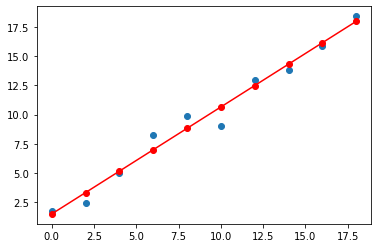

In [10]:
plt.scatter(array_x,array_y)
plt.plot(list_linear_x, linear_fit(list_linear_x, param[0], param[1]),c='r', marker='o')